In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subjects = ["","John","Elvis","Ashley","Gabrielle"]

In [3]:
def detect_face(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/cv2/data/lbpcascade_frontalface.xml')
    
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)
    print('Len faces',len(faces))
    if(len(faces) == 0):
        return None, None
    
    #(x,y,w,h) = faces[0]
    result = []
    for face in faces:
        (x,y,w,h)= face
        result.append((gray[y:y+w, x:x+h], face))
        
    return result #gray[y:y+w, x:x+h], faces[0]
    

In [4]:
def prepare_training_data(data_folder_path):
    dirs = os.listdir(data_folder_path)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith("s"):
            continue
        
        label = int(dir_name.replace("s",""))
        
        subject_dir_path = data_folder_path+"/"+dir_name
        subject_images_names = os.listdir(subject_dir_path)
        
        for image_name in subject_images_names:
            if image_name.startswith("."):
                continue
                
            image_path = subject_dir_path+"/"+image_name
            image = cv2.imread(image_path)
            
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            resultList = detect_face(image)
            face = None 
            rect = None
            if len(resultList)==1:
                face, rect = resultList[0]
            else:
                print('Multiple faces')
            
            if face is not None:
                faces.append(face)
                labels.append(label)
                
    return faces, labels

In [5]:
faces, labels = prepare_training_data("training-data")
#print("Data prepared")

#print("Total faces: ", len(faces))
#print("Total labels: ",len(labels))

Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 2
Multiple faces
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 0
Multiple faces
Len faces 1
Len faces 1
Len faces 0
Multiple faces
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 0
Multiple faces
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1
Len faces 1


In [6]:
face_recognizer  = cv2.face.LBPHFaceRecognizer_create()

#cv2.face.LBPHFisherFaceRecognizer()
#recognizer = **cv2.face.LBPHFaceRecognizer_create()**


In [7]:
#pip install opencv-contrib-python

In [8]:
face_recognizer.train(faces, np.array(labels))

### PREDICTION

In [9]:
def draw_rectangle(img, rect):
    (x,y,w,h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0,255,0), 2)

In [10]:
def predict(test_img):
    img = test_img.copy()
    result1 = []
    #face, rect = detect_face(img)
    resultList = detect_face(img)
    if len(resultList) == 0:
        face, rect = resultList[0]
        label = face_recognizer.predict(face)
        
        #print("Label",label[0],"\n")
        label_text = subjects[label[0]]
        #print('LabelTxt:',label_text)
        draw_rectangle(img, rect)
        draw_text(img, label_text, rect[0], rect[1]-5)
        result1= img,label[0]
    else:
        for face, rect in resultList:
            label = face_recognizer.predict(face)
            label_text = subjects[label[0]]
            draw_rectangle(img, rect)
            draw_text(img, label_text, rect[0], rect[1]-5)
            a=(img, label[0])
            
            print(type(a))
            result1.append(a)
    #print("Label: ",result1[0][0])
    return result1 #img,label[0]

Len faces 1
<class 'tuple'>
1
Len faces 2
<class 'tuple'>
<class 'tuple'>


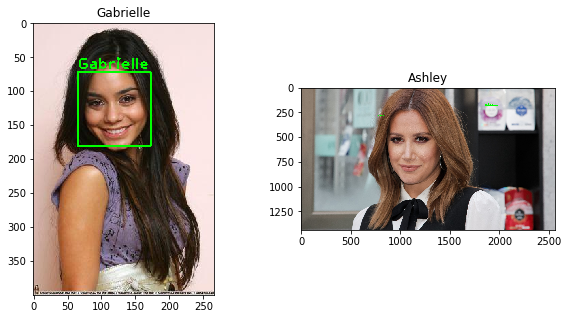

In [11]:
test1 = cv2.imread('test-data/test6.jpg')
test2 = cv2.imread('test-data/test3.jpg')
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

r1=predict(test1)
print(len(r1))
if(len(r1)==1):
    predict1,label1 = r1[0]
    ax1.set_title(subjects[label1])
    ax1.imshow(cv2.cvtColor(predict1, cv2.COLOR_BGR2RGB))
r2 = predict(test2)
predict2=None
label2=None
if(len(r2)==1):
    predict2,label2 = r2[0]
else:
    predict2,label2 = r2[0]
    ax2.set_title(subjects[label2])
    ax2.imshow(cv2.cvtColor(predict2, cv2.COLOR_BGR2RGB))

Len faces 0


TypeError: cannot unpack non-iterable NoneType object

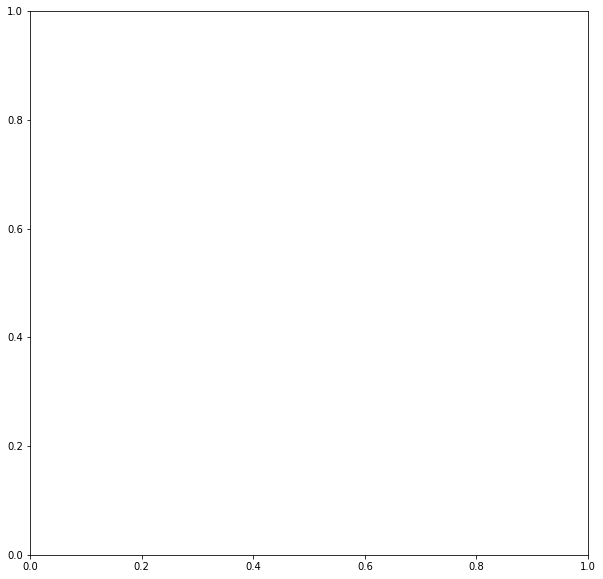

In [15]:
test3 = cv2.imread('test-data/test4.jpg')
f, ax = plt.subplots(1,1, figsize=(10,10))
labelFinal = ""
r3 = predict(test3)
if(len(r3)==1):
    predict3,label3 = r3[0]
    labelFinal = subjects[label3]
    ax.imshow(cv2.cvtColor(predict3, cv2.COLOR_BGR2RGB))
else:
    predi = r3[0][0]
    for pred,label in r3:
        print(label)
        labelFinal= labelFinal+","+subjects[label]
    ax.imshow(cv2.cvtColor(predi, cv2.COLOR_BGR2RGB))




ax.set_title(labelFinal)  

#ax2.set_title(subjects[label2])
#ax2.imshow(cv2.cvtColor(predict2, cv2.COLOR_BGR2RGB))